In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X , y = make_blobs(n_samples=1000 , centers=3 , n_features=2 , random_state = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_train)

silhouette_score(X_train , kmeans.labels_)
kmeans.inertia_


1601.7572142093766

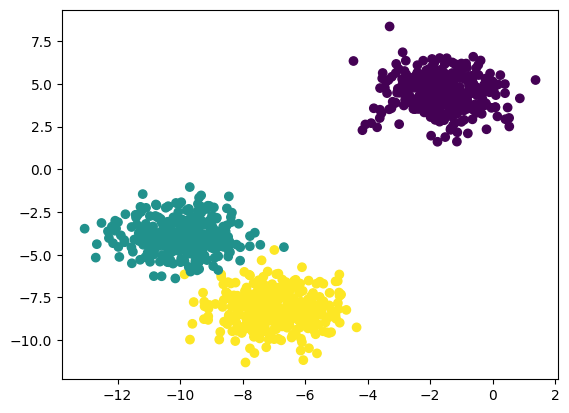

In [11]:
plt.scatter(X[:,0],X[:,1] , c=y)

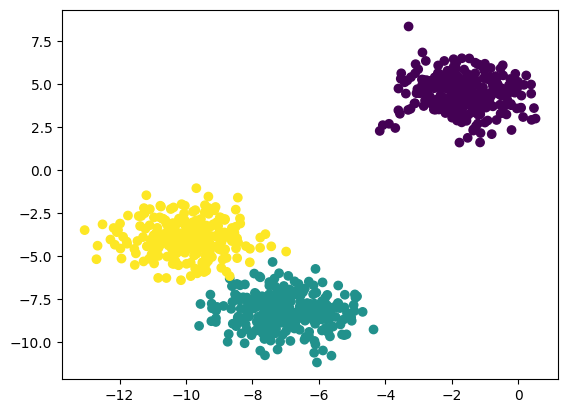

In [12]:
plt.scatter(X_train[:,0],X_train[:,1] , c=y_pred)

In [17]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[33215.66635316584,
 5116.117085396342,
 1601.7572142093766,
 1386.8700976711584,
 1241.839928622316,
 1046.8607069828272,
 950.4531533448203,
 818.2210378342617,
 758.8358153690359]

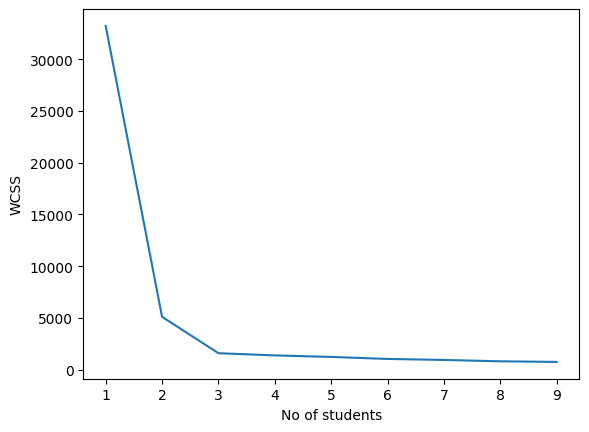

In [19]:
plt.plot(range(1, 10), wcss)
plt.xticks(range(1, 10))
plt.xlabel("No of students")
plt.ylabel("WCSS")
plt.show()

In [23]:
!pip install  kneed

In [24]:
from kneed import KneeLocator
k1 = KneeLocator(range(1, 10), wcss, curve = 'convex', direction = 'decreasing')
k1.elbow

np.int64(2)

In [25]:
silhouette_coeff = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coeff.append(score)

In [26]:
silhouette_coeff

[np.float64(0.7679215178240377),
 np.float64(0.7189150136434668),
 np.float64(0.5956892757753645),
 np.float64(0.4024041345618704),
 np.float64(0.4018961303525239),
 np.float64(0.3256681141289553),
 np.float64(0.3325092079086598),
 np.float64(0.3473315992024311)]